In [44]:
import pandas as pd

In [45]:
df=pd.read_csv('covid.csv')

In [46]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEAD,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,2,0,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
1,2,1,1,1,0,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
2,2,1,1,1,0,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
3,2,1,1,2,0,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
4,2,1,1,2,0,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [47]:
df.shape

(10000, 21)

In [48]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DEAD', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   USMER                 10000 non-null  int64
 1   MEDICAL_UNIT          10000 non-null  int64
 2   SEX                   10000 non-null  int64
 3   PATIENT_TYPE          10000 non-null  int64
 4   DEAD                  10000 non-null  int64
 5   INTUBED               10000 non-null  int64
 6   PNEUMONIA             10000 non-null  int64
 7   AGE                   10000 non-null  int64
 8   PREGNANT              10000 non-null  int64
 9   DIABETES              10000 non-null  int64
 10  COPD                  10000 non-null  int64
 11  ASTHMA                10000 non-null  int64
 12  INMSUPR               10000 non-null  int64
 13  HIPERTENSION          10000 non-null  int64
 14  OTHER_DISEASE         10000 non-null  int64
 15  CARDIOVASCULAR        10000 non-null  int64
 16  OBESI

In [50]:
df.isnull().sum()
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DEAD                    0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [51]:
df['DEAD'].value_counts()

0    9000
1    1000
Name: DEAD, dtype: int64

C:\Users\hanve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


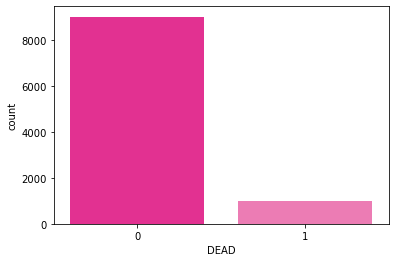

In [52]:
from matplotlib.colors import ListedColormap
sns.countplot(df['DEAD'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(df['DEAD']).iloc[:4].index)
plt.show()

In [53]:
df_corr = df.corr()
print(df_corr)

                         USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE  \
USMER                 1.000000     -0.147123 -0.007369     -0.131717   
MEDICAL_UNIT         -0.147123      1.000000  0.026546      0.031737   
SEX                  -0.007369      0.026546  1.000000      0.131147   
PATIENT_TYPE         -0.131717      0.031737  0.131147      1.000000   
DEAD                 -0.035639      0.039050  0.096934      0.457281   
INTUBED               0.128439     -0.036080 -0.129932     -0.984051   
PNEUMONIA            -0.154210      0.008847 -0.024641     -0.094932   
AGE                   0.043241      0.066808  0.057533      0.311130   
PREGNANT             -0.007538      0.026805  0.998366      0.131877   
DIABETES              0.037051      0.002779  0.004346      0.004451   
COPD                  0.030624      0.006535  0.014999      0.027535   
ASTHMA                0.035183      0.006968  0.022257      0.026686   
INMSUPR               0.037184      0.008274  0.008900      0.02

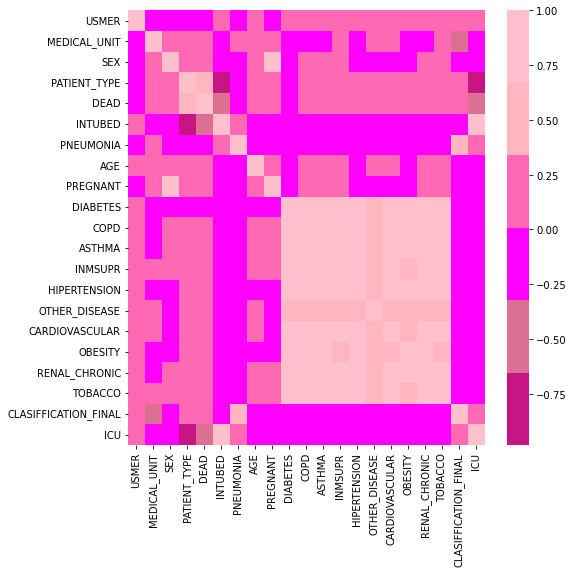

In [54]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, cbar=True, annot=False, yticklabels=df.columns,
            cmap=ListedColormap(['#C71585', '#DB7093', '#FF00FF', '#FF69B4', '#FFB6C1', '#FFC0CB']),
            xticklabels=df.columns)
plt.show()

In [55]:
high_correlation = df_corr.abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
print(high_correlation_sort[21:31])

ICU           INTUBED         0.999212
INTUBED       ICU             0.999212
SEX           PREGNANT        0.998366
PREGNANT      SEX             0.998366
INTUBED       PATIENT_TYPE    0.984051
PATIENT_TYPE  INTUBED         0.984051
              ICU             0.983295
ICU           PATIENT_TYPE    0.983295
HIPERTENSION  COPD            0.931865
COPD          HIPERTENSION    0.931865
dtype: float64


C:\Users\hanve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


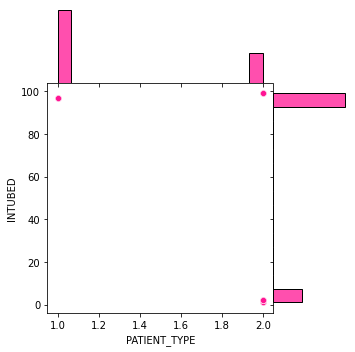

In [56]:
sns.jointplot("PATIENT_TYPE", "INTUBED", data=df, kind="scatter",
              space=0, color="#FF1493", height=5, ratio=3)
plt.show()

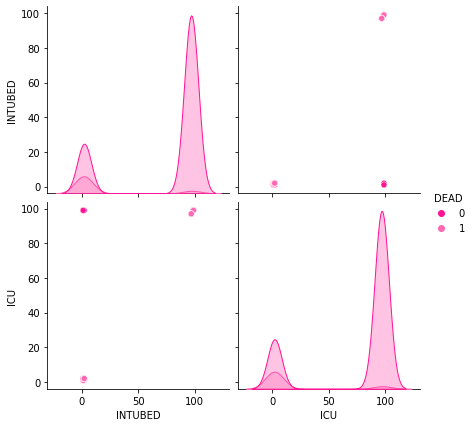

In [57]:
sns.pairplot(df, vars=["INTUBED", "ICU"],
             palette=sns.color_palette(['#FF1493', '#FF69B4']), hue='DEAD', height=3)
plt.show()

In [58]:
X=df.drop(['DEAD'],axis=1)
y=df['DEAD']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=41)

In [61]:
import numpy as np
from sklearn.feature_selection import SelectPercentile
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(df), 6))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42, test_size=0.20)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
#select = SelectKBest(k=)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (8000, 20)
X_train_selected.shape: (8000, 10)


In [70]:
X_test_selected=select.transform(X_test)
print("X_test.shape: {}".format(X_test.shape))
print("X_test_selected.shape: {}".format(X_test_selected.shape))

X_test.shape: (2000, 20)
X_test_selected.shape: (2000, 10)


In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet

In [64]:
pipe = Pipeline([('prep', MinMaxScaler()),('class',LogisticRegression(max_iter=10000))])

param_set=[{'class':[SVC(kernel='rbf')],'class__gamma':[0.001,0.01,0.1,1,10,100,1000],
            'class__C':[0.001,0.01,0.1,1,10,100,1000],'prep':[MinMaxScaler()]},
           {'class':[LogisticRegression(max_iter=10000,solver='saga',penalty='elasticnet')],
            'class__C':[0.001,0.01,0.1,1,10,100,1000],'class__l1_ratio': [0 ,0.25,0.5, 0.75, 1],'prep':[StandardScaler()]},
           {'class':[RandomForestClassifier(n_estimators=1000)],
            'class__max_depth':[None,1,3,5],'prep':[None]}]

fold=KFold(n_splits=5,shuffle=True)
grid=GridSearchCV(pipe,param_grid=param_set,cv=fold,n_jobs=-1)

grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.942

In [65]:
print("Best parameter: {:.2f}",grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Best parameter: {:.2f} {'class': SVC(C=100, gamma=10), 'class__C': 100, 'class__gamma': 10, 'prep': MinMaxScaler()}
Best cross-validation score: 0.93
Test set score: 0.94


In [71]:
pipe = Pipeline([('prep', MinMaxScaler()),('class',LogisticRegression(max_iter=10000))])

param_set=[{'class':[SVC(kernel='rbf')],'class__gamma':[0.001,0.01,0.1,1,10,100,1000],
            'class__C':[0.001,0.01,0.1,1,10,100,1000],'prep':[MinMaxScaler()]},
           {'class':[LogisticRegression(max_iter=10000,solver='saga',penalty='elasticnet')],
            'class__C':[0.001,0.01,0.1,1,10,100,1000],'class__l1_ratio': [0 ,0.25,0.5, 0.75, 1],'prep':[StandardScaler()]},
           {'class':[RandomForestClassifier(n_estimators=1000)],
            'class__max_depth':[None,1,3,5],'prep':[None]}]

fold=KFold(n_splits=5,shuffle=True)
grid=GridSearchCV(pipe,param_grid=param_set,cv=fold,n_jobs=-1)

grid.fit(X_train_selected,y_train)
grid.score(X_test_selected,y_test)

0.9405

In [72]:
print("Best parameter: {:.2f}",grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test_selected, y_test)))

Best parameter: {:.2f} {'class': SVC(C=100, gamma=10), 'class__C': 100, 'class__gamma': 10, 'prep': MinMaxScaler()}
Best cross-validation score: 0.93
Test set score: 0.94


In [74]:
results=pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class,param_class__C,param_class__gamma,param_prep,param_class__l1_ratio,param_class__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.868478,0.006254,0.608761,0.023763,"SVC(C=100, gamma=10)",0.001,0.001,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 0....",0.898125,0.894375,0.8875,0.900625,0.90375,0.896875,0.005604,64
1,0.912565,0.055121,0.609042,0.018417,"SVC(C=100, gamma=10)",0.001,0.01,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 0....",0.898125,0.894375,0.8875,0.900625,0.90375,0.896875,0.005604,64
2,1.004841,0.014403,0.607420,0.017316,"SVC(C=100, gamma=10)",0.001,0.1,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 0....",0.898125,0.894375,0.8875,0.900625,0.90375,0.896875,0.005604,64
3,1.007299,0.034715,0.579382,0.017078,"SVC(C=100, gamma=10)",0.001,1,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 0....",0.898125,0.894375,0.8875,0.900625,0.90375,0.896875,0.005604,64
4,0.933351,0.023903,0.623409,0.017177,"SVC(C=100, gamma=10)",0.001,10,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 0....",0.898125,0.894375,0.8875,0.900625,0.90375,0.896875,0.005604,64


In [75]:
results.shape

(88, 19)

In [89]:
r=results.sort_values(by=['mean_test_score'],ascending=False)
r.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class,param_class__C,param_class__gamma,param_prep,param_class__l1_ratio,param_class__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,11.812136,1.862201,0.936146,0.039532,"SVC(C=100, gamma=10)",100,10,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.936875,0.931250,0.925000,0.923750,0.934375,0.930250,0.005133,1
87,7.313621,1.000128,0.309622,0.095274,RandomForestClassifier(n_estimators=1000),NaN,NaN,None,NaN,5,{'class': RandomForestClassifier(n_estimators=...,0.938125,0.927500,0.925625,0.926250,0.931250,0.929750,0.004620,2
46,68.833639,18.754612,0.845524,0.067840,"SVC(C=100, gamma=10)",1000,10,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.938750,0.931250,0.921250,0.922500,0.933750,0.929500,0.006690,3
45,32.567207,11.399931,0.774835,0.014248,"SVC(C=100, gamma=10)",1000,1,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.936875,0.927500,0.927500,0.925000,0.930625,0.929500,0.004096,3
33,4.325406,0.381647,1.106731,0.072046,"SVC(C=100, gamma=10)",10,100,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.933750,0.930625,0.918750,0.920000,0.934375,0.927500,0.006766,5
38,4.645003,0.973381,0.930342,0.038509,"SVC(C=100, gamma=10)",100,1,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.928750,0.917500,0.928125,0.925000,0.931875,0.926250,0.004889,6
40,15.885917,4.120459,1.064128,0.059836,"SVC(C=100, gamma=10)",100,100,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.935000,0.925625,0.917500,0.918750,0.933125,0.926000,0.007165,7
32,3.392488,0.484836,1.011307,0.066298,"SVC(C=100, gamma=10)",10,10,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.928750,0.923125,0.917500,0.921250,0.931875,0.924500,0.005175,8
47,96.407164,13.218374,1.043177,0.109251,"SVC(C=100, gamma=10)",1000,100,MinMaxScaler(),NaN,NaN,"{'class': SVC(C=100, gamma=10), 'class__C': 10...",0.935000,0.918750,0.911875,0.914375,0.931875,0.922375,0.009349,9
86,7.520418,0.076298,0.557180,0.034242,RandomForestClassifier(n_estimators=1000),NaN,NaN,None,NaN,3,{'class': RandomForestClassifier(n_estimators=...,0.922500,0.919375,0.917500,0.917500,0.922500,0.919875,0.002250,10
